# Kmeans

__The WHO has declared COVID-19 a pandemic that is caused by SARS-CoV-2 virus and has created challenges among scientist and engineers. Extensive research are going on to find possible vaccines and solutions to control the pandemic. Collaborations between scientists, research institutions are very vital for the success. They require to explore the information from huge amount of research articles published about covid, virus, pandemic and related topics. In response to the pandemic, the contribution of this project will be to apply ML and NLP techniques to explore insights from the resource of approximately 10000 scholarly articles about CORD-19__

__Task__:
* Clustering
* Visualize wordcloud for respective cluster


__Orignial Datasets__

* Total article = over 200,000
* With full text = over 100,000
* About = COVID-19, SARS-CoV2 and related corona virus

__column for clustering__

* title : 341563
* abstract: 243898
* pcm_json_files: 93581

__Due to computational power we use__

* Total article = approax. 10560 samples

__Data Source__

* Prepared by Allen Institute for AI
* url: https://www.semanticscholar.org/cord19/download

In [19]:
from mllab.KMeans import KMeans

In [20]:
import pandas as pd
import numpy as np
import time
import datetime
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt

__TFidfVectorizer, Normalizer and PCA used only for preprocessing of datasets__

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [22]:
covid19 = pd.read_csv('datasets/covid19.csv')

In [23]:
covid19.shape

(10126, 5)

In [24]:
covid19.head()

,text,word_count,unique_words_count,lang,label
0,surfactant protein d pulmonary host defense su...,3903,1060,en,2
1,heme oxygenase carbon monoxide pulmonary medic...,3480,1019,en,2
2,functional genomic functional immunomic new ch...,3851,1051,en,2
3,model base design growth attenuated virus live...,4262,1029,en,2
4,object simulation model model hypothetical dis...,3915,1111,en,0


In [25]:
def Vectorization(corpus, max_features):
    total_time = 0
    start = time.time()
    
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    
    stop = time.time()
    total_time = stop - start
    time_taken = str(datetime.timedelta(seconds=total_time))
    print("Total duration :",time_taken) 
    
    return X

In [26]:
corpus = covid19['text'].values

In [27]:
corpus = covid19['text'].values
X = Vectorization(corpus,5000)

Total duration : 0:00:27.122763


In [28]:
transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [29]:
pca = PCA(n_components=0.95, random_state=42)
X_new = pca.fit_transform(X.toarray())
X_new.dtype

dtype('float64')

In [31]:
X_ = pd.DataFrame(X_new)

__Kmeans Implementation__

In [34]:
km = KMeans()
km.train(X_, 3)
clusters, y_pred = km.infer()

/Users/uni/Documents/6th-sem/projectX/mllab/metrics.py:21: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(C)


/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


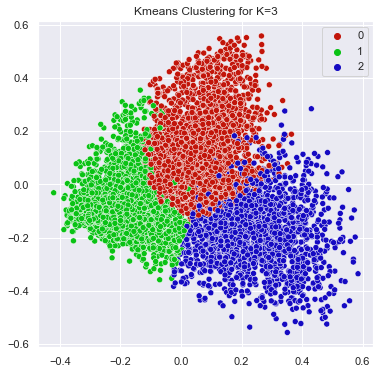

In [36]:
%matplotlib inline
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(6,6)})

# colors
#lightness, saturaion
palette = sns.hls_palette(3, l=.4, s=.9)

# plot
# hue : Grouping variable that will produce points with different colors
#palette : Method for choosing the colors to use when mapping the hue semantic

sns.scatterplot(X_new[:,0], X_new[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('Kmeans Clustering for K=3')
plt.show()

In [37]:
def cloud(df,cluster):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df))
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    filename = str(cluster)+".png"
    fig.savefig(filename, dpi=900)

__wordcloud have some unwanted words due to lack of preprocessing__

__Here we can see paper on cluster 0, are related to pandemic influenza, simulation, outbreak and so on..__

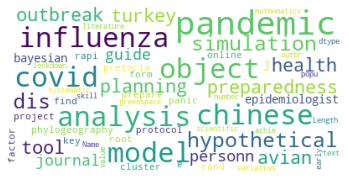

In [38]:
text0 = covid19[covid19['label'] == 0]
cloud(text0['text'],0)

__Here we can see paper on cluster 1, are related to nucleolus, defence, honey, immune, vaccination and so on..__

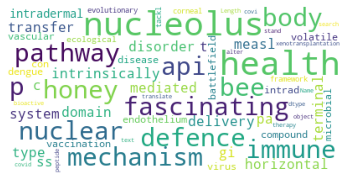

In [39]:
text1 = covid19[covid19['label'] == 1]
cloud(text1['text'],1)

__Here we can see paper on cluster 2 are related to protein, pulmonary, genomic, oxygenase and so on..__

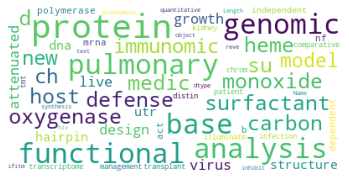

In [40]:
text2 = covid19[covid19['label'] == 2]
cloud(text2['text'],2)